<h1 'style=text-align:center';>THE KEY REQUIREMENTS OF GETTING A MORTGAGE LOAN IN WASHINGTON,DC</h1>



# Context

* The Home Mortgage Disclosure Act (HMDA) requires many financial institutions to maintain, report, and publicly disclose information about mortgages. These public data are important because they help show whether lenders are serving the housing needs of their communities; or help authourities to determine and fish out all predatory act of lending; they give public officials information that helps them make decisions and policies; and they shed light on lending patterns that could be discriminatory.  
* Eg. a reported increase in mortgage borrowing by blacks and Hispanics as of 1993.

# content
This project will generally consist of there main parts:  
1) **Exploratory data analysis and recommendations**   
2)**Feature Engineering**   
3) **Prediction**    
**we will try as much as possible to keep things simple and concise**

# 1.0.0) EXPLORATORY DATA ANALYSIS SECTION

We will start off by importing various libraries for our analysis.
The css code below will create border lines around our dataframes

In [22]:
%%HTML
<style type='text/css'>
table.dataframe td,table.dataframe th{
    border: 1px solid black !important;
    color: solid black !important
}
</style>

In [23]:
# create a class to print different font properties in python
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [24]:
# Importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold,train_test_split

import string
import warnings
warnings.filterwarnings('ignore')

SEED = 42

le = LabelEncoder()

In [25]:
sns.set_style('whitegrid')

In [26]:
df_main = pd.read_csv('/kaggle/input/washington-state-home-mortgage-hdma2016/Washington_State_HDMA-2016.csv',low_memory=False)

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

**1.0.1)**
### An Overview
* The shape of the data is (466565,47) which means it contains 466,566 unique data entries and 47 attribute/features/columns.
* Dataset has 34 features with object datatype, 9 with float datatype and 4 with integer datatype.

In [27]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           465951 non-null  float64
 1   rate_spread                     8638 non-null    float64
 2   population                      465956 non-null  float64
 3   minority_population             465956 non-null  float64
 4   number_of_owner_occupied_units  465944 non-null  float64
 5   number_of_1_to_4_family_units   465955 non-null  float64
 6   loan_amount_000s                466566 non-null  int64  
 7   hud_median_family_income        465960 non-null  float64
 8   applicant_income_000s           404533 non-null  float64
 9   state_name                      466566 non-null  object 
 10  state_abbr                      466566 non-null  object 
 11  sequence_number                 466566 non-null  int64  
 12  respondent_id   

### 1.0.2) This is the overall description of some numerical features of the dataset

>`Loan amount`: Is the amount of money the applicant applied for.  
>`as_of_year`: Is the the reporting year of the HMDA record.

* The Average loan amount received by applicants is `$`$298.26k$ and the average income of applicants is `$`$112.98k$ which is slightly lower than the loan receives by applicants.  

* The minimum loan amount received by applicants is `$`$1k$ USD(United States Dollars) which is proportional to the minimum annual gross income of applicants thus `$`$1k$.
* The median `tract_to_msamd_income`(The percentage of the median family income for the tract compared to the median family income for the MSA/MD) is `$`$104.530k$.  
> * Tract or Census Tract: Is an area equivalent to a noughborhood consisting of a population between 2,800 and 8,000.  
> * Metropolitan statistical areas (MSA): are delineated by the U.S. Office of Management and Budget (OMB) as having at least one urbanized area with a minimum population of 50,000.  
* The minimum,average and maximum interest `rate_spread` is 1.50, 1.72 and 13.66 respectively.
>The interest rate spread is what the company charges on a loan compared to its cost of money.
* The average `hud_median_family_income` is `$`$76797.148$ 
> * hud_median_family_income is median family income in dollars for the MSA/MD in which the tract is located.
* `as_of_year` is the year the HDMA data was given to the federal agency.

In [28]:
df_main.describe()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,census_tract_number,as_of_year,application_date_indicator
count,465951.000000,8638.000000,465956.000000,465956.000000,465944.00000,465955.000000,466566.000000,465960.000000,404533.000000,4.665660e+05,465960.000000,466566.0,466566.000000
mean,106.906157,2.120028,5288.219117,24.765475,1389.05978,1822.137288,298.260936,76797.148468,112.984713,1.126340e+05,1395.489104,2016.0,0.207285
std,29.280418,1.113000,1665.350069,15.214602,506.75606,682.031693,760.741532,12959.051933,125.115972,2.020830e+05,2950.970895,0.0,0.609593
min,14.050000,1.500000,5.000000,2.040000,10.00000,10.000000,1.000000,48700.000000,1.000000,1.000000e+00,1.000000,2016.0,0.000000
25%,87.260002,1.590000,4124.000000,13.220000,1032.00000,1395.000000,172.000000,65800.000000,60.000000,5.121000e+03,117.010000,2016.0,0.000000
50%,104.529999,1.720000,5173.000000,20.750000,1359.00000,1734.000000,248.000000,73300.000000,89.000000,2.647200e+04,323.220000,2016.0,0.000000
75%,123.809998,2.000000,6342.000000,32.220001,1705.00000,2171.000000,350.000000,90300.000000,133.000000,1.095258e+05,702.030000,2016.0,0.000000
max,257.140015,13.660000,13025.000000,94.790001,2997.00000,5893.000000,99999.000000,90300.000000,9999.000000,1.241780e+06,9901.000000,2016.0,2.000000


### 1.0.3) Describing the non-numerical features

* Most of the mortgage applicants are male representing $60.76$% and female of $23.61$%. The remaining $15.63$% applicants didn't provide their gender status.
* All the properties are located in the Washington state from which this entire Mortgage data was collected.
* The `loan_type_name` provide information of the institutions or individuals that guaranteed the loan:Government programs offered by Federal Housing Administration (FHA), the Department of Veterans Affairs (VA), or the Department of Agriculture's Rural Housing Service (RHS) or Farm Service Agency (FSA). All other loans are classified as conventional. For this data, most loans were guaranted Convetionally representing %$71.30$ and the rest %$29.70$.
* In the loan process %$99.997$ percent of it was not subjected to the Home Ownership and Equity Protection Act(HOEPA).
    >The Home Ownership and Equity Protection Act is a federal law that discourages banks and other financial institutions from predatory lending when they fund mortgages and home equity loans.
    
* Per this data set, the top-most reasons of being denied of loan is because of `Debt_to_income ratio`.

In [29]:
df_main.describe(include='O').iloc[:,20:]

,co_applicant_race_name_3,co_applicant_race_name_2,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
count,105,1862,466566,466566,466566,46,68,297,4478,466566,466566,466566,466566,466566
unique,3,5,8,5,4,4,5,5,5,7,4,6,6,8
top,White,White,No co-applicant,No co-applicant,Male,White,Native Hawaiian or Other Pacific Islander,White,White,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
freq,75,1403,211725,211725,283475,42,43,204,3401,314812,350149,238716,238716,263712


In [30]:
df_corr = df_main.corr().abs().unstack().sort_values(ascending=False)
df_corr = df_corr.reset_index() 
df_corr.columns = ['feat_one','feat_two','count']
df_corr = df_corr[df_corr['count'] != 1.0][1::2]
df_corr[df_corr['count'] > 0.3]

,feat_one,feat_two,count
13,number_of_1_to_4_family_units,number_of_owner_occupied_units,0.853762
15,population,number_of_owner_occupied_units,0.767629
17,population,number_of_1_to_4_family_units,0.726803
19,census_tract_number,hud_median_family_income,0.457330
21,tract_to_msamd_income,minority_population,0.424554
23,number_of_owner_occupied_units,tract_to_msamd_income,0.385813


### 1.0.4) `action_taken_name`
Loan origination is the process by which a borrower applies for a new loan, and a lender processes that application. This process ends when the loan is approved or denied. In this case `loan originated` means the loan has been approved for disbursement in our case.

what is `loan purchased by institution`: Most lenders sell loans to **Secondary market** due to liquidity reasons, meaning they either don’t want the loans in their balance sheet or they sell loans so they can lend to more borrowers.

**Secondary Market** is basically an institution willing to buy loans from the primary lenders. When this happens, either the secondary market will resume the service right(means consumers have to make payment to the secondary market) or the service right is retained by the original lender.

**NB:** In our case, we will remove all loans that were sold to secondary institutions since we want to deal directly to primary lenders.  
We will also take-out loans that were withdrawn by applicants `Application withdrawn by applicant`.

In [31]:
print(df_main['action_taken_name'].unique())

df_main = df_main[(df_main['action_taken_name'] != 'Loan purchased by the institution') & (df_main['action_taken_name'] != 'Application withdrawn by applicant')]

['Loan originated' 'Application approved but not accepted'
 'Application denied by financial institution'
 'Application withdrawn by applicant' 'File closed for incompleteness'
 'Loan purchased by the institution'
 'Preapproval request denied by financial institution'
 'Preapproval request approved but not accepted']


We will also drop some selected columns that have too much missing values and are not really of much importance to this project.

### 1.0.5) What is the main reason why applicants are denied of loans.

* The `denial_reason_name_1`,`denial_reason_name_2` and `denial_reason_name_3` columns contain the various reason why an applicant loan application is denied. Each applicant has atmost three reasons to be denied of a loan.  
> **NB:**There is a huge number of missing data: a total of **42491** out of **1031065** is missing accross the three columns. Decision about it would be made a the Feature engineering section.
* Since we want the overall reasons that cuts accross all the three columns,the three features would be joined together into one column.
* After that we find the percentage of each reason compared to the others.  


  
* From the graph below, the significant reason why applicants are denied of loans is `Debt-to-income` ratio and bad `Credit History` having $23$% and $22$% respectively.
 > The debt-to-income ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments.
 Most lenders don't want it to be above 36%.
 
 > Credit history is a record of a consumer's ability to repay debts and demonstrated responsibility in repaying debts.
 
* The most avoidable one is the incomplete loan application. A number of $6,184$ representing $1.73$ `%` of the total loan applications were denied because of incompleted application.

In [32]:
print(df_main[['denial_reason_name_1',
               'denial_reason_name_2',
               'denial_reason_name_3']].isna().sum(),'\n\n')

print('Total available values = {}'.format(df_main[['denial_reason_name_1',
                                                    'denial_reason_name_2',
                                                    'denial_reason_name_3']].notna().sum().sum()))

print('Total missing values = {}'.format(df_main[['denial_reason_name_1',
                                                  'denial_reason_name_2',
                                                  'denial_reason_name_3']].isna().sum().sum()))


denial_reason_name_1    323353
denial_reason_name_2    351106
denial_reason_name_3    356606
dtype: int64 


Total available values = 42491
Total missing values = 1031065


In [33]:
df_loan_denial = df_main[['denial_reason_name_1','denial_reason_name_2','denial_reason_name_3']]

df_loan_denial = pd.DataFrame(pd.concat([df_loan_denial['denial_reason_name_1'],
                                         df_loan_denial['denial_reason_name_2'],
                                         df_loan_denial['denial_reason_name_3']],
                                         ignore_index=True).value_counts(normalize=True),
                                         columns=['denial_reason_count'])

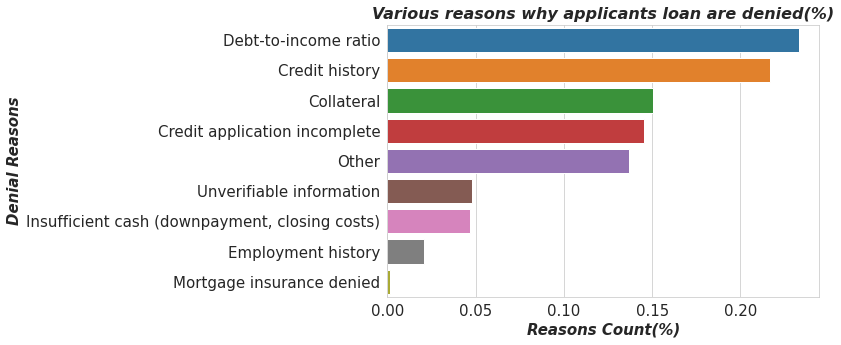

In [34]:
fig,ax  = plt.subplots(figsize=(10,5))

sns.barplot(y=df_loan_denial.index,x=df_loan_denial.denial_reason_count,orient='h');

plt.ylabel('Denial Reasons',fontdict={'fontsize':15,'fontstyle':'italic','fontweight':'bold'})

plt.xlabel('Reasons Count(%)',fontdict={'fontsize':15,'fontstyle':'italic','fontweight':'bold'})

plt.tick_params(axis='both',labelsize=15)

plt.subplots_adjust(left=0.3)

plt.title('Various reasons why applicants loan are denied(%)',
          fontdict={'fontsize':16,'fontstyle':'italic','fontweight':'bold'});

### 1.0.6) Does applicants gross income play role in his/her loan attainment?

In figure **1.0.5,** it shows clearly that debt-to-income ratio is the main reason why applicants are denied of loans.
This brings up the question, is  high income applicants having an edge over the lower income groups?
This turned out be true!.

We will create a new column called `loan_approved` which will consist of binary, `1` means loan was approved and `0` means denied. The we will divide the entire dataset into two groups of dataframes `loan_approved` and `loan_denied` and then print out the mean and median income of both categories.

* The bar plot shows that the mean and median income of those with their loans approved is slightly higher than those with their loans denied.

In [35]:
# creating loan_approved column from the action_taken_name columns
df_main['loan_approved'] = df_main['action_taken_name'].apply(lambda x: 1 if x == 'Loan originated' else 0)

loan_approved,loan_denied = df_main[df_main['loan_approved'] == 1],df_main[df_main['loan_approved'] == 0]

print('Approved mean {} and median {}'.format(loan_approved['applicant_income_000s'].mean(),
                                              loan_approved['applicant_income_000s'].median()))

print('Denied mean {} and median {}'.format(loan_denied['applicant_income_000s'].mean(),
                                            loan_denied['applicant_income_000s'].median()))

Approved mean 116.65957623218928 and median 93.0
Denied mean 102.43835552167029 and median 77.0


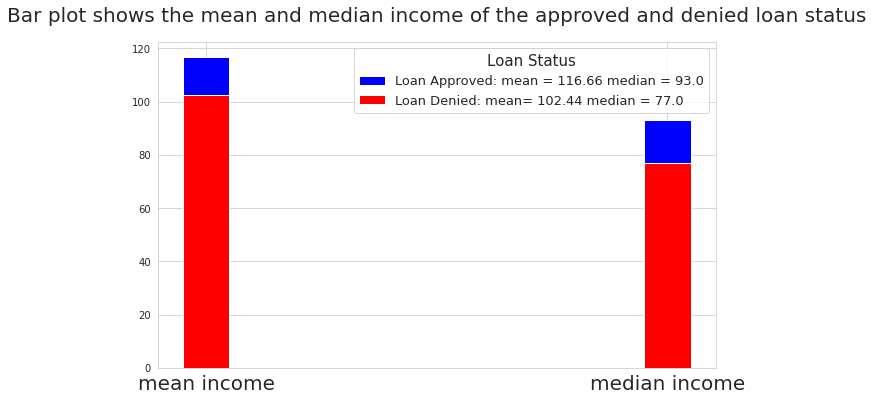

In [36]:
app_loan_mean,app_loan_med = loan_approved['applicant_income_000s'].mean(),loan_approved['applicant_income_000s'].median()

den_loan_mean,den_loan_med = loan_denied['applicant_income_000s'].mean(),loan_denied['applicant_income_000s'].median()

fig,ax = plt.subplots(1,1,sharey=True,figsize=(10,6))
ax.bar(x=['mean income','median income'],height=(app_loan_mean,app_loan_med),color='b',alpha=1,width=0.1)
ax.bar(x=['mean income','median income'],height=(den_loan_mean,den_loan_med),color='red',width=0.1)

plt.legend(['Loan Approved: mean = {} median = {}'.format(np.round(app_loan_mean,2),app_loan_med),
            'Loan Denied: mean= {} median = {}'.format(np.round(den_loan_mean,2),den_loan_med)],
           fontsize=13,title='Loan Status',title_fontsize=15)

ax.tick_params(axis='x',labelsize=20)
plt.title('Bar plot shows the mean and median income of the approved and denied loan status',fontsize=20,pad=20);

### 1.0.7) CAN LOW OR HIGH NEIGHBOURHOOD FAMILY INCOME OF WHERE THE PROPERTY IS LOCATED AFFECT APPLICANTS CHANCES OF GETTING A LOAN?

From the HMDA dataset, lenders disclose the census tract of applicants instead of making their addressess public, which is part of the community where the property is located.Each census tract is located in a Metropolitian Statistical Area/Metropolitian Division (MSA/MD). 
The `hud_median_family_income` is the median family income in dollars for the MSA/MD in which the tract is located.

Basically,you must be expecting that for a loan to be approved the applicant's income must be quite similar or above the neighbourhood median family income.  
well, this is in some sense true! but wait,we will see how applicants with their average income LOWER,EQUAL or HIGHER than the mean neighborhood median income of where the property is located are affected.

**NOTE ON THE PLOT**  
    1) md = msamd/md  
    2) st=mean_status  
    3) st = $-1$ (applicants with their income lower),  $0$ ( applicants with their income equal) and  $1$  (applicants with their income higher)  
    4) On the x-axis, `0` and `1` means `loan_approved` and `loan_denied` respectively

**FINDINGS**
* In all  Metropolitian Statistical Area/Metropolitian Division (MSA/MD),it is obvious that number of applicants with their loans approved is significantly higher than those that were denied.
* As you view from **right to left** each row, you could see a slight increase in the number of `loan_denied` for almost all the plots.
Applicants whose median_income is lower than the median neigbhorhood income of the census tract, have got their `loan_denied bar (0)` comparatively taller to the rest on the right especially msamd **Yakima-WA**.

`loan_denied`:
  - -1 > 0 > 1

In [37]:
# make a copy of the main dataframe
df_hud_appincome = df_main.copy()

#The trailing zeros in the column name indicates that the actual amount must be multiply by 1000 to the actual values
df_hud_appincome['applicant_income_000s'] = df_hud_appincome['applicant_income_000s']*1000

# This column will hold either applicant is below, equal or above the average mean income of its neighbors
df_hud_appincome['mean_status'] = 0


In [38]:
# list of msamd names
msamd = list(df_hud_appincome['msamd_name'].unique())

# function to indicate each applicants mean_status
# Running this can take significant amount of time.
# You can skip this cell and run the next and you will get the exact data this function will produce

def mean_sort(df,msamd):
    for msamd_name in msamd:
        df_batch = df[df['msamd_name'] == msamd_name]
        avg_hud_income = df_batch['hud_median_family_income'].mean()
        for row in range(df_batch.shape[0]):
            indx_val = df_batch.iloc[[row]]['applicant_income_000s']
            indx,val= indx_val.index[0],indx_val.values[0]
            if val > avg_hud_income:
                df.loc[indx,'mean_status'] = 1
            elif val < avg_hud_income:
                df.loc[indx,'mean_status'] = -1
            else:
                pass
    return df

# The resulting dataframe
# df_trans = mean_sort(df_hud_appincome,msamd)

# Convert the transformed dataframe into Commas Separated Files 
# NB: This is optional

# df_trans.to_csv('df_transformed',index=False)

In [39]:
df_trans = pd.read_csv('/kaggle/input/transformed-dataframe/df_transformed',low_memory=False)
# grouping by msamd name, mean status and loan_approved 
df_grouped = (df_trans.reset_index().groupby(['msamd_name','mean_status','loan_approved']).count()['index']).reset_index()

In [40]:

perc_list = []
# This will basically calculate all the percentage of its corresponding
for indx in range(0,df_grouped.shape[0],2):
    curr_val,next_val = df_grouped.loc[indx,'index'],df_grouped.loc[indx+1,'index']
    curr_next_val = curr_val + next_val
    curr_perc,next_perc = (curr_val/curr_next_val)*100,(next_val/curr_next_val)*100
    perc_list.append(np.round(curr_perc,2)),perc_list.append(np.round(next_perc,2))

df_grouped = pd.concat([df_grouped,pd.Series(perc_list,name='percentage %')],axis=1)

In [41]:
# Because the plots are many, we shorten the names to allow space
df_grouped.rename({'msamd_name':'md','mean_status':'st'},axis=1,inplace=True)

**NOTE ON THE PLOT**  
    1) md = msamd/md  
    2) st=mean_status  
    3) st = $-1$ (applicants with their income lower),  $0$ ( applicants with their income equal) and  $1$  (applicants with their income higher)  
    4) On the x-axis, `0` and `1` means `loan_approved` and `loan_denied` respectively

**INSIGHT**
* In all  Metropolitian Statistical Area/Metropolitian Division (MSA/MD),it is obvious that number of applicants with their loans approved is significantly higher than those that were denied.
* As you view from right to left each row, you could see a slight increase in the number of `loan_denied` for almost all the plots.
Applicants whose median_income is lower than the average neigbhorhood income of the census tract, have got their `loan_denied bar (0)` comparatively taller to the rest on the right especially msamd **Yakima-WA**.

`loan_denied`:
  - -1 > 0 > 1

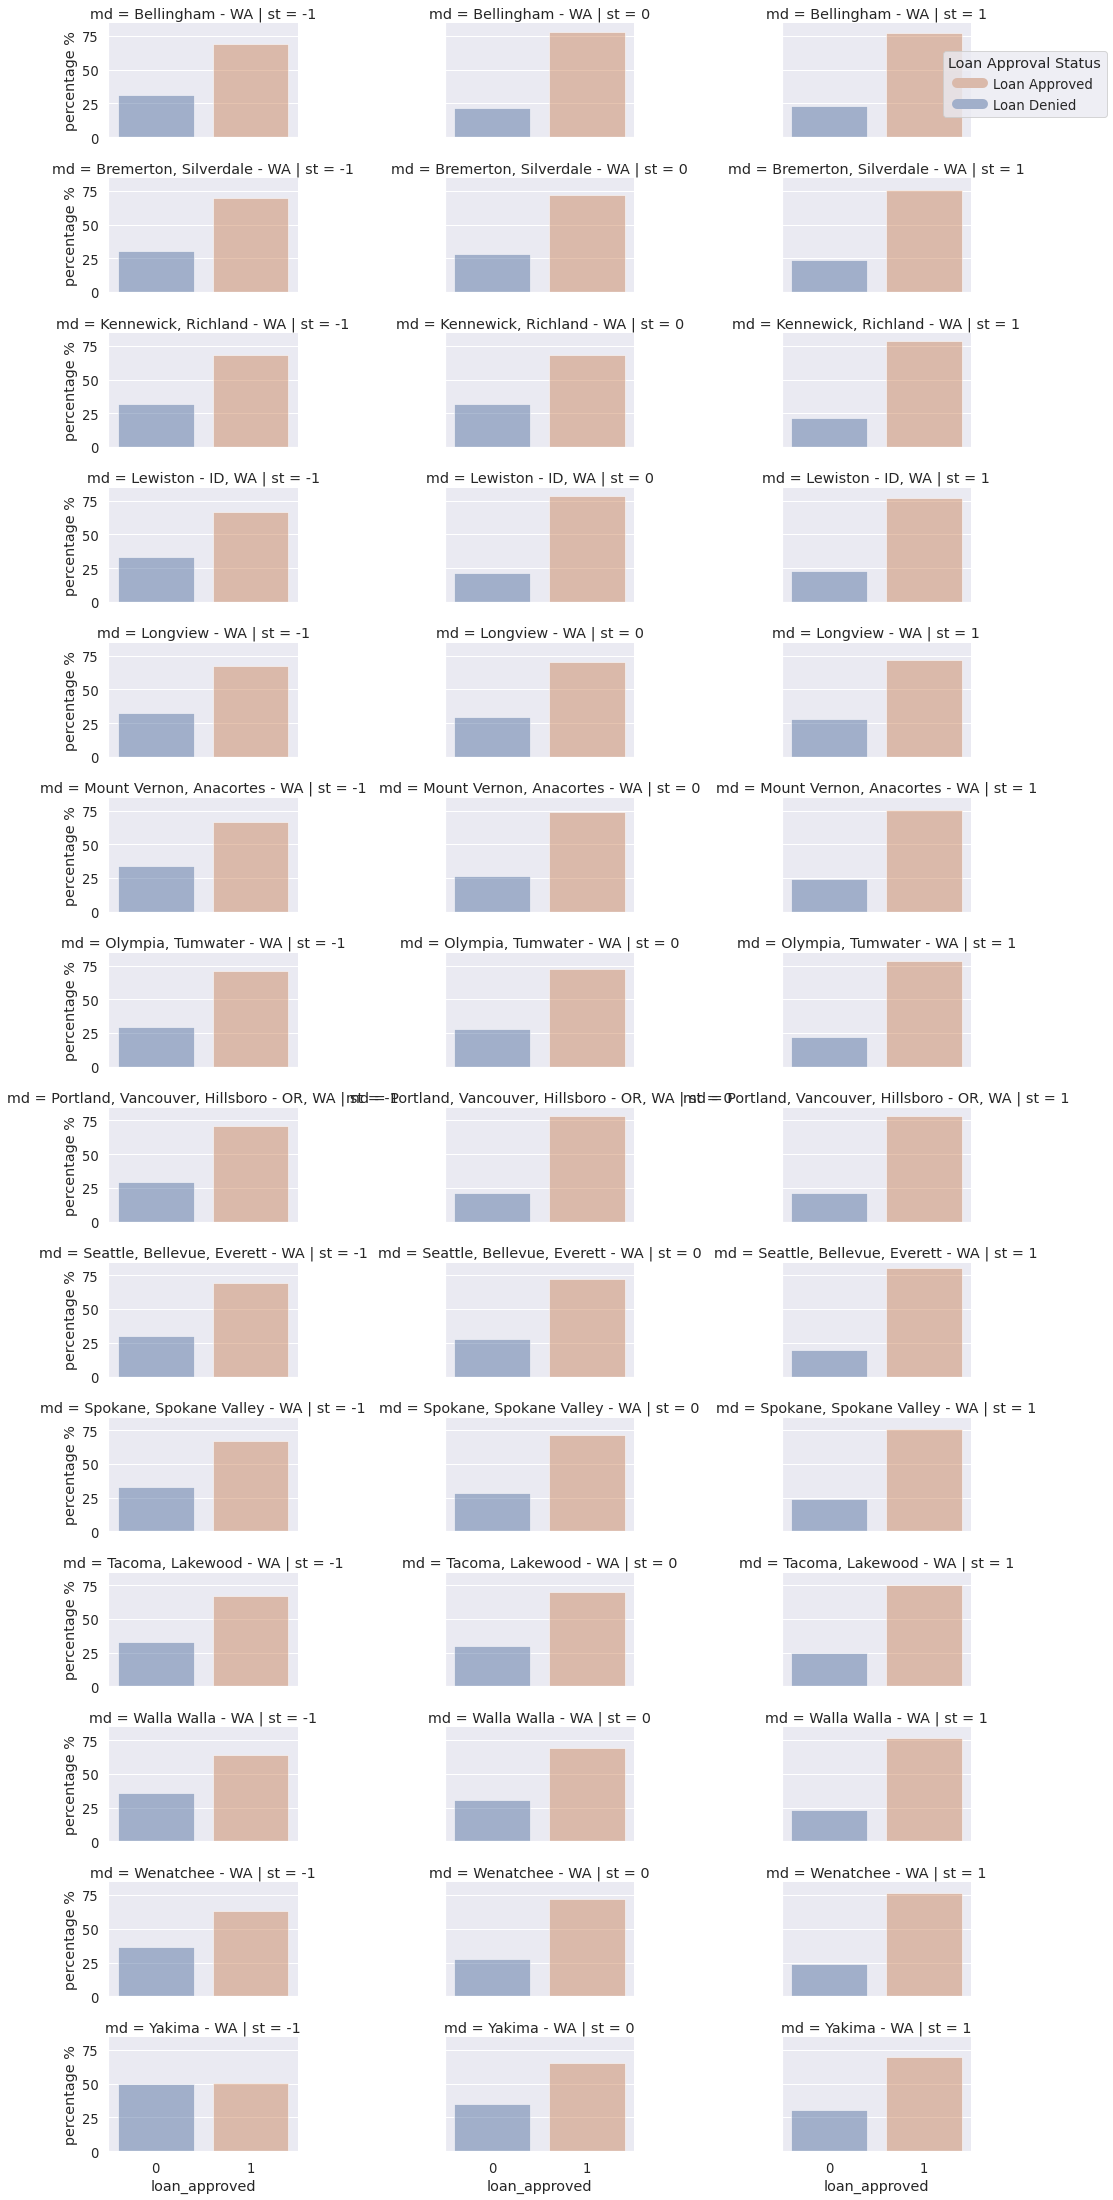

In [42]:
# creating a facetgrid with MSA/MD, Mean Status,loan_approved, percentage %
sns.set(font_scale=1.2)
grid = sns.FacetGrid(df_grouped, row='md', col='st', height=2.2, aspect=2)
grid.map(sns.barplot, 'loan_approved', 'percentage %', alpha=.5, ci=None,order=[0,1],palette='deep')
grid.add_legend();

axes = plt.gca()

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm

custom_lines = [Line2D([0], [0], color='#dab9aa', lw=10),
                Line2D([0], [0], color='#a1afca', lw=10)]


axes.legend(custom_lines, ['Loan Approved', 'Loan Denied'],title='Loan Approval Status',
           loc='best', bbox_to_anchor=(0.85, 0.5, 0.9, 18));

<a id='property'></a>
### 1.0.8) WHAT KIND OF PROPERTY HAS THE HIGHEST LOAN APPROVAL RATE?

**1-4 family dwelling, multifamily dwelling and manufactured housing are the three property types.**  

**Manufactured homes**: are housing that is esentially ready for occupancy upon leaving the factory and being transported to a building site.  

**Multifamily dwelling:** means any housing unit where two (2) or more dwellings are separated by a common wall, floor or ceiling, including but not limited to apartments, condominiums and townhouses.

**Results**:

* Applicants for multifamily dwelling housing property has the highest percentage of qualifying for loans.

    >This result is obvious because some lenders want to be sure that you will have enough money to start making payment at the earlier stage since such property can produce a cashflow of decent rental income. 
    
    >Most applicants of multifamily dwelling are mostly investors and they obviously have good credit-score history and they also provide decent down payment.


It's tougher to get a loan for manufactured housing.

> Many manufactured home loan programs have strict guidelines about the property condition and age. That’s because manufactured housing tends to depreciate, while traditional home values tend to increase over time.

In [43]:
# creating a dataframe with `loan_approved` grouped by property_type_name as index
df_cross = pd.crosstab(df_main['property_type_name'],df_main['loan_approved'])

# creating a dictionary of property_type_name and its percentage
perc_dict = {}

for indx in range(df_cross.shape[0]):
#     calculate percentage
    percentage = df_cross.loc[df_cross.index[indx],1]/(df_cross.loc[df_cross.index[indx],0] + df_cross.loc[df_cross.index[indx],1])
    
    perc_dict[df_cross.index[indx]] = np.round(percentage*100,2)


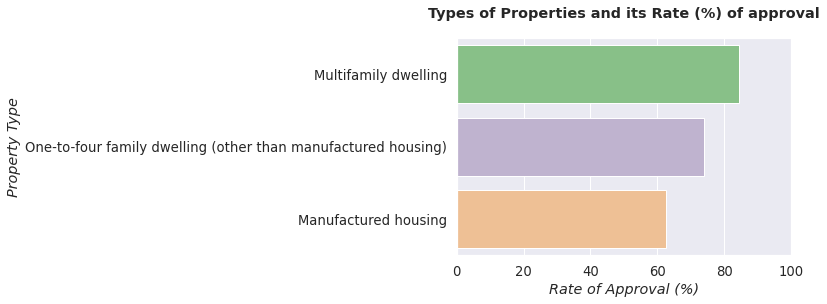

In [44]:
# getting the x and y values for the plot
x = list(perc_dict.keys())
y = list(perc_dict.values())

# creating a barplot of a property type and its rate of approval
sns.barplot(y,x,orient='h',order=sorted(perc_dict,key=lambda x: x[1],reverse=True),palette='Accent');

plt.xlabel('Rate of Approval (%)',fontstyle='italic')
plt.ylabel('Property Type',fontstyle='italic')
plt.xlim([0,100])

# title
plt.title('Types of Properties and its Rate (%) of approval',pad=20,fontweight='bold');

### 1.0.9) Which type of loans have a better chance of being approved?  

There are loans that are insured or guaranteed by government programs offered by:  
    1) Federal Housing Administration (FHA)   
    2). Department of Veterans Affairs (VA)  
    3) Department of Agriculture's Rural Housing Service (RHS) or Farm Service Agency (FSA).  
    All other loans are classified as conventional.
    
* It turned out that,FSA/RHS has the highest rate of loan approval whiles FHA stands the highest risk of getting their loans denied.  
* The FSA/RHS are basically Agencies set to help low-income rural residence and farmers to get loans. Applicants guaranteed under this agency needs not to worry about credit history or present income since they are pardoned from such criteria but they should be able make payment for their loan,taxes and insurance.  
* FSA takes up to 95% percent of loss.

In [45]:
# creating a dataframe with loan_type_name and loan approval_approved
df_main['loan_type_name'].unique()

df_loan_type = pd.crosstab(df_main['loan_type_name'],df_main['loan_approved'],normalize='index')

In [46]:
# df_loan_type

In [47]:
def rate_barplot(df,label1=None,label2=None,title=None,x_label=None,y_label=None):
    """This return a barplot with a well labelled axis"""
#     getting the x values from the length of the dataframe
    x = np.arange(df.shape[0])
    
#     index of the df as a label
    labels = list(df.index)
    fig  = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    width = 0.35

    ret1 = ax.bar(x-width/2,df[0],width=width,label=label1)
    ret2 = ax.bar(x+width/2,df[1],width=width,label=label2)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim([0,1])
    ax.set_title(title,fontsize=15,fontweight='bold')
    ax.set_ylabel(y_label,fontstyle='italic')
    ax.set_xlabel(x_label,fontstyle='italic')

    ax.grid(True,which='minor',axis='y')

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(np.round(height*100,2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(ret1)
    autolabel(ret2)
#     position the legend outside the main axis
    plt.legend(loc='best', bbox_to_anchor=(0.85, 0.5, 0.5, 0.5))

    plt.setp(ax.get_xticklabels(),rotation=45,ha='right');
    plt.show()

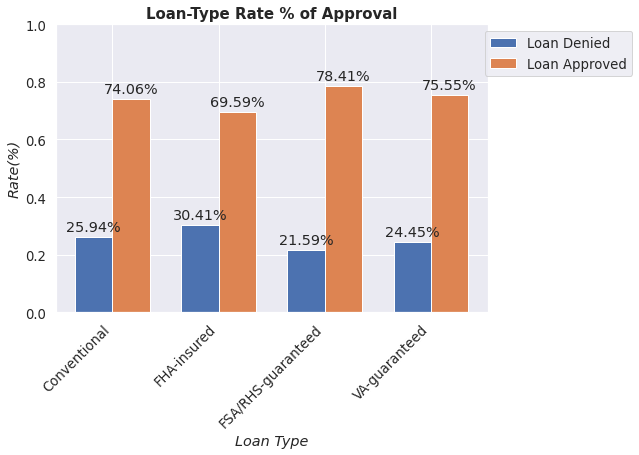

In [48]:
# creating barplot with the `rate_barplot` function

rate_barplot(df_loan_type,'Loan Denied','Loan Approved','Loan-Type Rate % of Approval','Loan Type','Rate(%)')

### 1.1.0) WHICH COUNTY HAS THE HIGHEST NUMBER OF LOAN APPLICANTS AND HIGHEST RATE OF LOAN APPROVAL?

**King County has the highest number of loan applicants**

* King County according to the 2019 us population and housing census is having a whooping number 2,252,782 residents which makes it the most populous county in Washington and the 13th most populous county in America.

* The second highest is Pierce County, also having a population of 904,980 residents making it the second and 61st most populous county in Washington and United States respectively.

* Atleat this two give a clear indication of how the number of applicants correlate with the population of that county.
* `King County` has the highest rate of loan approval followed by snohomish County.

In [49]:
df_main['county_name'].value_counts().head()

King County         107404
Pierce County        45833
Snohomish County     45172
Clark County         28885
Spokane County       21932
Name: county_name, dtype: int64

In [50]:
pd.crosstab(df_main['county_name'],df_main['loan_approved'],normalize='index').sort_values(by=[1],ascending=False).head(5)[1]

county_name
King County         0.762532
Snohomish County    0.758944
Clark County        0.756310
Benton County       0.746893
Thurston County     0.744960
Name: 1, dtype: float64

### 1.1.1) CAN THE PURPOSE OF THE LOAN ALSO HELP YOU GET IT?

Loan applicantions are intended for `Refinancing`, `Home Purchase` and `Home Improvement`.  
Home Purchase and Home Improvement is self explainatory.  

`Refinancing:`Refinancing means getting a new mortgage to replace the original. Refinancing is done to allow a borrower to obtain a better interest term and rate.
* From our graph, applying for a loan to purchase a home has significant rate over the other two.

In [51]:
df_main['loan_purpose_name'].unique()

array(['Refinancing', 'Home purchase', 'Home improvement'], dtype=object)

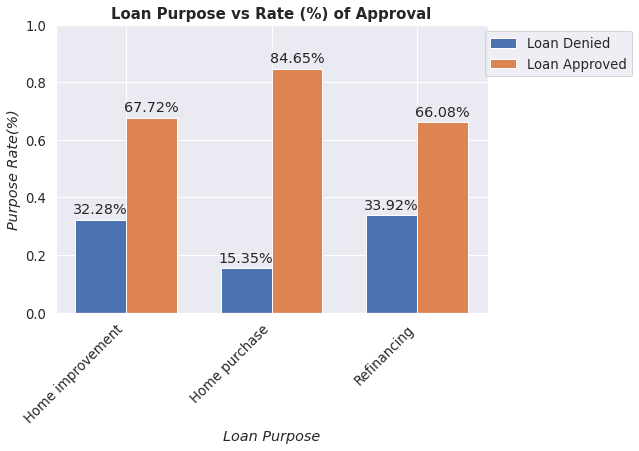

In [52]:
df_purpose = pd.crosstab(df_main['loan_purpose_name'],df_main['loan_approved'],normalize='index')

rate_barplot(df_purpose,'Loan Denied','Loan Approved','Loan Purpose vs Rate (%) of Approval',
             'Loan Purpose','Purpose Rate(%)')

<a id='hoepa_owner'></a>
### 1.1.2) HOW DOES THE `OWNER_OCCUPANCY_NAME` AND `HOEPA_STATUS_NAME` AFFECT LOAN APPLICATION?


`HOEPA:` The Home Ownership and Equity Protection Act (HOEPA) was enacted in 1994 as an amendment to the Truth in Lending Act (TILA) to address abusive practices in refinances and closed-end home equity loans with high interest rates or high fees. So `HOEPA_STATUS_NAME` shows whether or not a loan was subjected to heopa regulations.

`Owner_occupancy_name:` Basically shows the owner-occupancy status of the property. Second homes, vacation homes, and rental properties are classified as "not owner-occupied as a principal dwelling".

For multifamily dwellings (housing five or more families), and any dwellings located outside MSA/MDs, or in MSA/MDs where an institution does not have home or branch offices, an institution may either enter`not applicable`. Most of these properties are for investment purposes.

* None of the loans that were indicated as ` Non_applicable` were subjected to hoepa status
* All the loans subjected to hoepa status stands $100$% rate of approval
* multifamily dwellings (housing five or more families)  that is once indicated as `not_applicable` also have comparatively higher rate of approval.
* The Owner occupied houses have a slight chance over the not_owner occupied homes

In [53]:
# grouping the dataframe with three columns being the index and loan_approved values
df_hoepa_grp = pd.crosstab([df_main['owner_occupancy_name'],
             df_main['hoepa_status_name']],df_main['loan_approved'],
            normalize='index').reset_index()

# create loan_approved columns filled with zeros indicating loan denied
df_hoepa_grp['loan_approved'] = 0
df_hoepa_grp_0 = df_hoepa_grp.drop(1,axis=1).rename(columns={0:'percentage'})

# Create loan_approved columns filled with ones indicating loan approved
df_hoepa_grp['loan_approved'] = 1
df_hoepa_grp_1 = df_hoepa_grp.drop(0,axis=1).rename(columns={1:'percentage'})

# combine the dataframes
df_hoepa_grp_combine = pd.concat([df_hoepa_grp_0,df_hoepa_grp_1],axis=0,ignore_index=True,sort=False)


In [54]:
# In order to have a well layed out plot, lets shorten the name the columns and the owner_occupancy_name

df_hoepa_grp_combine.rename(columns={'owner_occupancy_name':'owner_occupy',
                                     'hoepa_status_name':'hoepa_st','percentage':'rate(%)'},inplace=True)

df_hoepa_grp_combine['owner_occupy'] = df_hoepa_grp_combine['owner_occupy'].map({'Not owner-occupied as a principal dwelling':'not_prin_dweller',
                               'Owner-occupied as a principal dwelling':'prin_dweller',
                                 'Not applicable':'not_applic'})
df_hoepa_grp_combine

loan_approved,owner_occupy,hoepa_st,rate(%),loan_approved
0,not_applic,Not a HOEPA loan,0.168124,0
1,not_prin_dweller,HOEPA loan,0.000000,0
2,not_prin_dweller,Not a HOEPA loan,0.281589,0
3,prin_dweller,HOEPA loan,0.000000,0
4,prin_dweller,Not a HOEPA loan,0.261726,0
5,not_applic,Not a HOEPA loan,0.831876,1
6,not_prin_dweller,HOEPA loan,1.000000,1
7,not_prin_dweller,Not a HOEPA loan,0.718411,1
8,prin_dweller,HOEPA loan,1.000000,1
9,prin_dweller,Not a HOEPA loan,0.738274,1


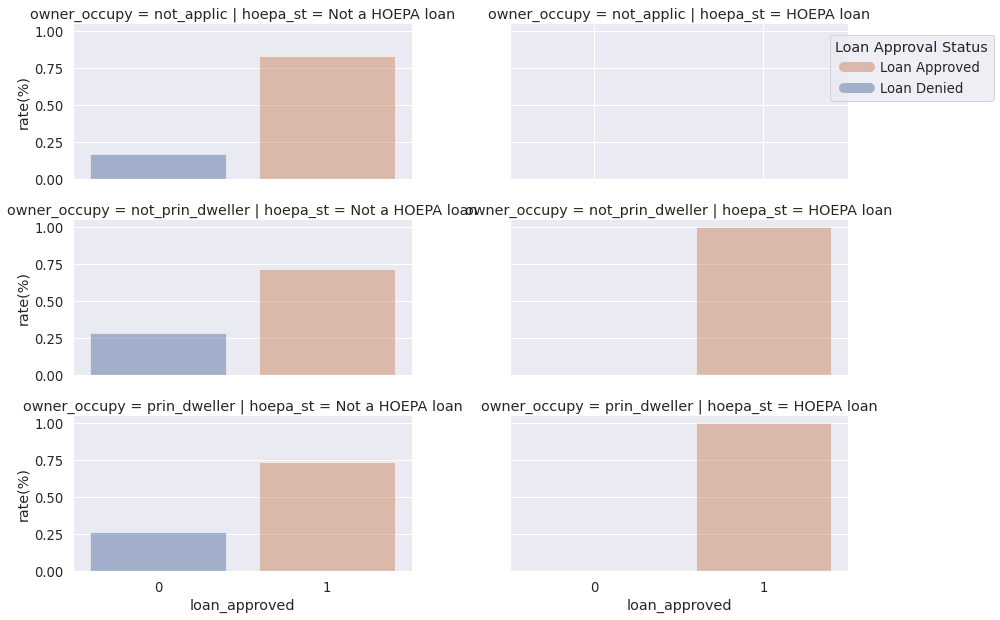

In [55]:
sns.set(font_scale=1.2)
grid = sns.FacetGrid(df_hoepa_grp_combine, row='owner_occupy', col='hoepa_st',height=2.95, aspect=2,margin_titles=False)
grid.map(sns.barplot,'loan_approved', 'rate(%)', alpha=.5, ci=None,order=[0,1],palette='deep')
grid.add_legend()

axes = plt.gca()

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm

custom_lines = [Line2D([0], [0], color='#dab9aa', lw=10),
                Line2D([0], [0], color='#a1afca', lw=10)]


axes.legend(custom_lines, ['Loan Approved', 'Loan Denied'],title='Loan Approval Status',
           loc='best', bbox_to_anchor=(0.85, 0.5, 0.6, 3));

### 1.1.3) DOES THE LIEN STATUS PLAY A ROLE IN THE LOAN APPROVAL?

* A lien is a claim or legal right against assets that are typically used as collateral to satisfy a debt.  A lien serves to guarantee an underlying obligation, such as the repayment of a loan.  

* Typical example is a payment agreement for a home loan. The documents includes provisions that allow the lender to keep you from selling the house until you pay what you(debter) owe.
* Let say that an investor is seeking for a loan to buy a real estate with an assessed value of `$`2,000,000
lender(first lien) approved a loan of `$` 1,500,000 the rest of the `$` 500,000 amount was approved by second lender(subordinate lien).

**Results:**
* Loan secured by a `first lien` has the highest rate of approval($74$%). This because loan subjected to this binds the debtor from not being allowed to sell the property untill the full loan repayment is been made. In this case there is relatively lower risk for lenders.  
* Loan secured by a `second lien` has the second highest rate of approval and this is clear because when the debtor defaults and there is a force liquidation of asset, the subordinate lien will only be paid if and only when the first lien( the primary lien's)  money is paid fully. In this case the second lien stands a degree of risk.
* `Not secured by a lien` has the lowest rate of approval ($0.55$%). Remember, the higher the risk of you paying the loan, the lower your chances of getting the loan

In [56]:
pd.crosstab(df_main['lien_status_name'],df_main['loan_approved'],normalize='index')

loan_approved,0,1
lien_status_name,,
Not secured by a lien,0.451569,0.548431
Secured by a first lien,0.259576,0.740424
Secured by a subordinate lien,0.292347,0.707653


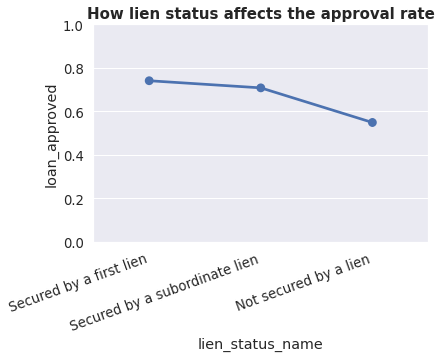

In [57]:
ax = sns.pointplot(x='lien_status_name',y='loan_approved',data=df_main)
plt.setp(ax.get_xticklabels(),rotation=20,ha='right');
plt.ylim([0,1]);
plt.title('How lien status affects the approval rate',fontsize=15,fontweight='bold');

# 1.1.4) IS THE LENDING PROCESS DESCRIMINATORY???

### i) We will start by comparing how county with certain percentage of minority and county above or below the overall median county approval rate affects loan approval.

* The United States is the third-most populous country in the world, with an estimated population of 329,227,746 as of January 28, 2020.

* White people constitute the majority of the U.S. population, with a total of about 234,370,202 or 73%."Non-Hispanic Whites" make up 60.7% of the country's population.

* Hispanic,Latino Americans and African/Black-Americans are the minority in USA.


* Properties that are located in the census_tract having a minority population between 13-32%, recorded the highest rate of loan approval for both above and below the overall median approval rate of all counties. Such counties are mixed-racial.

* Applying for a loan to purchase a property located in county that have HIGHER minority population and also below the overall median approval rate of all counties ,have lower rate of loan approval than the LOWER minority populated areas.This can be basically the fact that, people in those counties have low income which makes lenders think that taking loan to invest in those areas may be more riskier so they tend not to approve.

In all the four categories,counties that are below the `median approval rate of all counties` have lower rate of loan approval.

In [58]:
# make a copy of the main. Name the new df as df_county_population
df_county_population = df_main.copy()

# Take out all nan counties
df_county_population = df_county_population[df_county_population['county_name'].notna()]

# make a dataframe of county name as index and loan_approved as values. get the median approval rate for all the counties
med_county_appr_rate = np.round((pd.crosstab(df_county_population['county_name'],
                    df_county_population['loan_approved'],normalize='index')[1]).median(),2)

df_county_rate = pd.crosstab(df_county_population['county_name'],df_county_population['loan_approved'],normalize='index')

# Get names of all counties above the median county approval rate
count_name_above_roa = df_county_rate.loc[df_county_rate[1] >= med_county_appr_rate].index.tolist()

# create 'Aboveall_county_median_appr_rate' column to hold whether the county is above or below the overall median county rate of
# approval. above=1 and below=0
df_county_population['Aboveall_county_median_appr_rate'] = df_county_population['county_name'].isin(count_name_above_roa).astype(int)

# list of all county names
county_name_list = df_county_population['county_name'].unique().tolist()

# county names with its respective average minority population rate
avg_popu_dict = df_county_population.groupby('county_name').mean()['minority_population'].to_dict()

# Fillin the null values in the minority_population with the average minority_population percentage of its particular county
for county_name in county_name_list:
    df_county_population.loc[(df_county_population['county_name'] == county_name) & (df_county_population['minority_population'].isna()),
                         'minority_population'] = avg_popu_dict[county_name]
    
# Break the minority_population into four quantiles
df_county_population['minority_population'] = pd.qcut(df_county_population['minority_population'],4)

In [59]:
# Make a dataframe of loan approval rate
df_county_pop = pd.crosstab([df_county_population['Aboveall_county_median_appr_rate'],
                             df_county_population['minority_population']],df_county_population['loan_approved'],
                            normalize='index').reset_index()

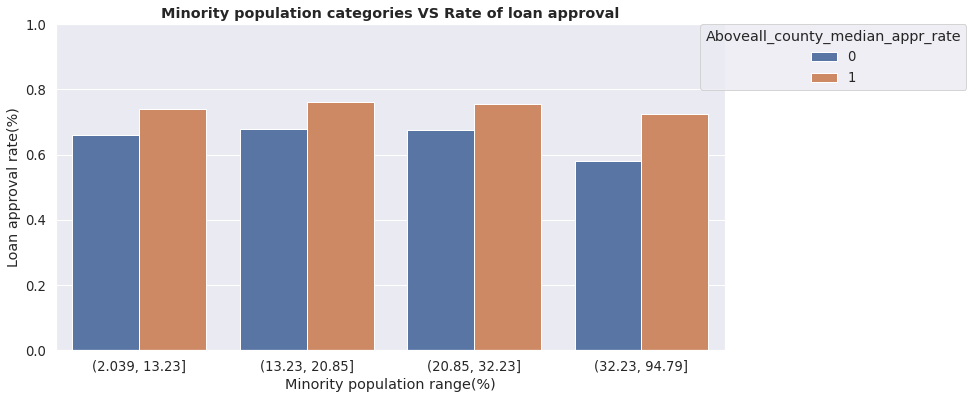

In [60]:
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(x='minority_population',y=1,data=df_county_pop,hue='Aboveall_county_median_appr_rate')

plt.ylim([0,1])
plt.legend(title='Aboveall_county_median_appr_rate',loc='best', bbox_to_anchor=(0.85, 0.5, 0.52, 0.52))

ax.set_xlabel('Minority population range(%)')
ax.set_ylabel('Loan approval rate(%)')
ax.set_title('Minority population categories VS Rate of loan approval',fontweight='bold');

### ii) Can applicant gender influence his/her loan?
**NB:** Because our main focus is on the two gender status `male` and `female`, we will take all others out of the `applicant_sex_name` column and `co_applicant_sex_name` column.
* It's recorded that, Male main applicants and Female co-applicants have a better chance of qualifying for a loan than all the remaining combination. This makes me think that couples have better chance over single applicants.
This is confirmed in a research article published by forbes. [You can get the details here](https://www.forbes.com/sites/trulia/2016/08/31/how-your-relationship-status-affects-mortgage-worthiness/#27b17b7e6114). 
 * As a single applicant,you have to be earning good income on your own in other to maintain good debt-to-income ratio and nice credit score(which is the main reason applicants loans are denied).
 * Couples can raise this income easily if they join their money, this gives them good debt-to-income ratio and nice credit score to make a hedge over single applicants.
* The heatmap also shows that main and co-applicants of the same-sex have slightly lower chances than the other way round.

minority_population,msamd_name,co_applicant_sex_name,co_applicant_race_name_5,co_applicant_race_name_4,co_applicant_race_name_3,co_applicant_race_name_2,co_applicant_race_name_1,co_applicant_ethnicity_name,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,loan_approved

In [61]:
# Make a copy of the main df into another called df_sex_grouped
df_sex_grouped = df_main.copy()

# Take only male and female sex from both main applicants and co-applicants columns
df_sex_grouped = df_sex_grouped[((df_sex_grouped['applicant_sex_name'] == 'Female') | (df_sex_grouped['applicant_sex_name'] == 'Male')) & ((df_sex_grouped['co_applicant_sex_name'] == 'Female') | (df_sex_grouped['co_applicant_sex_name'] == 'Male'))]

In [62]:
# create a pivot table with the dataframe
df_sex_grouped_pivot = pd.pivot_table(df_sex_grouped,values='loan_approved',index='applicant_sex_name',
                                      columns='co_applicant_sex_name',aggfunc='mean')

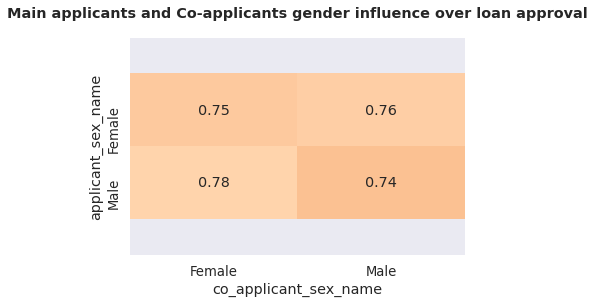

In [63]:
# Plot a heatmap
ax = sns.heatmap(df_sex_grouped_pivot,annot=True,center=0,cbar=False)
# add title to the plot
plt.title('Main applicants and Co-applicants gender influence over loan approval',pad=20,fontweight='bold');
bottom,top = ax.get_ylim()
# add 1/2 each to make the edge full
ax.set_ylim(bottom+0.5,top-0.5);

### iii) Can applicant loan be denied because of his/her race?
The issue of racism has been a problem in the United States since the foundation of the nation. 
`Not applicable` is the name given to institutions as applicants and co_applicants.
* The heatmap shows the rate of loan approval from the various race combination.
A more summarized version is a shown the tables.
We take a particular race of a main or co-applicants and combined it with the approval rate of the rest of the races and find the average.  

**Table 1**: Each column value is the mean value of race(column name) vs all other race. Example.
Assume the main applicant race is `WHITE` therefore as shown on the heatmap,we compare it with all the co-applicants race values then find the average.
after doing this calculation,`Black or African American` happens to have the lowest average rate of loan approval $65$% compared to the `white` race(majority) $75$%.

**Table 2**: Each column value is the mean value of co-applicant race(column name) vs all other race. Example.
Assume the co_applicant race is `WHITE` therefore as shown on the heatmap,we compare it with all the main applicants race values then find the average.
Again after doing this calculation,`Black or African American` happens to have the lowest average rate of loan approval $66$% compared to the `white` race(majority) $78$%.

* `Asian americans` a minority group, happens to be having the highest rate of loan approval $76$% and $79$% in both table 1 and 2 respectively.

A research article published by Pew Research Center shows that Blacks and Hispanics face extra challenges in getting home loans than the rest of the race in america.

The reasons lenders cite for turning down mortgage applications show different patterns depending on racial or ethnic group. Among whites, Hispanics and Asians rejected for conventional home loans, for instance, the most frequently cited reason was that their debt-to-income ratio was too high (25%, 26% and 29%, respectively). Among blacks, the most often cited reason was a poor credit history (31%).  
According to the research,Blacks and Hispanics generally put less money down on houses relative to total value than other groups. This makes lenders denied them of loan since it reflect the income status of the applicant and their ability to make repayments.
[click to read more on this interesting findings](https://www.pewresearch.org/fact-tank/2017/01/10/blacks-and-hispanics-face-extra-challenges-in-getting-home-loans/)

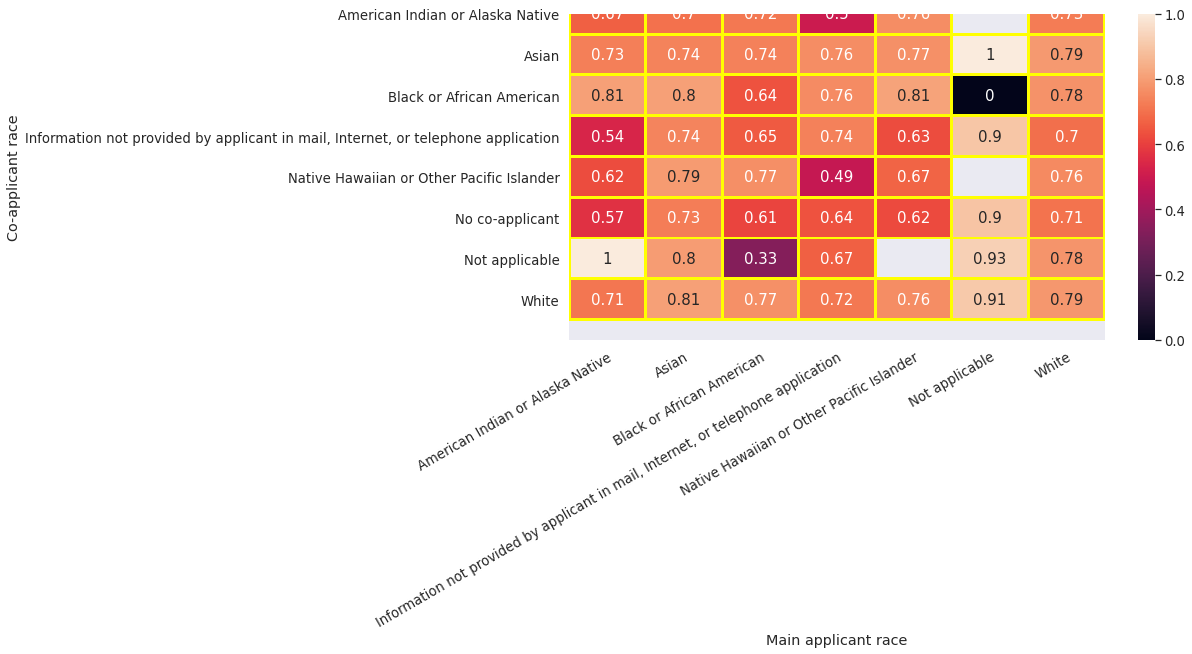

In [64]:
# make a pivot table with various features of the main dataframe.
df_applicants_pivot = pd.pivot_table(df_main,values='loan_approved',
                                     index='co_applicant_race_name_1',columns='applicant_race_name_1')
# create a figure
fig,ax = plt.subplots(figsize=(12,6))
# draw a heatmap
sns.heatmap(df_applicants_pivot,annot=True,annot_kws={"size": 15},linewidths=2, linecolor='yellow')
# get the bottom and top size of the map
bottom,top = ax.get_ylim()
# add 1/2 each to make the edge full
ax.set_ylim(bottom+0.5,top+0.5)

plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
         rotation_mode="anchor");

plt.ylabel('Co-applicant race')
plt.xlabel('Main applicant race');
plt.show()



In [65]:
column_names = df_applicants_pivot.columns.tolist()
df = pd.DataFrame({column_name:np.round(df_applicants_pivot[column_name].mean(),2) for column_name in column_names},
            index=['All_other_race'])
# set seaborn color map
cm = sns.light_palette("green", as_cmap=True)

def highlight(s):
    return 'background-color: yellow'
# add highlight and caption to the table
df.style.applymap(highlight,subset=['Black or African American','White'])\
    .set_caption('MEAN VALUE OF MAIN APPLICANT RACE NAME VS ALL OTHER RACE')


,American Indian or Alaska Native,Asian,Black or African American,"Information not provided by applicant in mail, Internet, or telephone application",Native Hawaiian or Other Pacific Islander,Not applicable,White
All_other_race,0.710000,0.760000,0.650000,0.660000,0.720000,0.770000,0.750000


In [66]:
column_names = df_applicants_pivot.columns.tolist()
df = pd.DataFrame({column_name:np.round(df_applicants_pivot.loc[column_name,:].mean(),2) for column_name in column_names},
            index=['All_other_race'])

cm = sns.light_palette("green", as_cmap=True)

def highlight(s):
    return 'background-color: yellow'

df.style.applymap(highlight,subset=['Black or African American','White'])\
    .set_caption('MEAN OF CO-APPLICANT RACE VS ALL OTHER RACE')


,American Indian or Alaska Native,Asian,Black or African American,"Information not provided by applicant in mail, Internet, or telephone application",Native Hawaiian or Other Pacific Islander,Not applicable,White
All_other_race,0.680000,0.790000,0.660000,0.700000,0.680000,0.750000,0.780000



<br>
<br>
   
<h3 'style=text-align:center';>RECOMMENDATIONS</h3>
<br>

 
 **Recommendations:**
 The following Nuggets will comparatively increase your chances in getting your loan approved in Washington DC:
   - Build good credit score. Even if you don't need loan now, for the sake of the future it is advisable to build good score.
   - Maintain good Debt-to-Income ratio.
   - Unfortunately, it turned out that high income earners have an edge over the lower income group. So you may consider taking high income job though its not a major requirement.
   - Make sure your median income is equal or higher than the median neigbhorhood income of where the property is located.
   - Choose to buy multifamily dwelling. Don't apply for loan to buy manufactured housing.
   - Apply for FSA/RHS loans. It has relatively high chance of loan approval.
   - Consider getting a Home loan in King County
   - Apply for a loan to purchase a house(`Home Purchase loan`) it has a significant approval rate.
   - If you want $100$% rate of approval for your loan, then, apply for HOEPA loans.
   - Secure your loan through first lien.

<br>
<br>
<h1'style=text-align:center';>2.0.0) FEATURE ENGINEERING SECTION<h1>
<br>

* Lets start by selecting features that are likely to be used in the model and drop the rest.It advisable to take out irrelevant features to simplify the dataset.
* Some of the  features too contain huge number of missing values which may lead to wrong predictions if not taken out.
* The `county_name` contains 209 missing values. You could see that most columns have missing values in that rows as well so it is logical to drop those rows.

In [67]:
df_main.isna().sum()

tract_to_msamd_income                358
rate_spread                       349214
population                           355
minority_population                  355
number_of_owner_occupied_units       360
number_of_1_to_4_family_units        356
loan_amount_000s                       0
hud_median_family_income             353
applicant_income_000s              31380
state_name                             0
state_abbr                             0
sequence_number                        0
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         29128
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  294132
denial_reason_name_3              356606
denial_reason_na

In [68]:
# list of selected features to maintain
sel_feat = ['tract_to_msamd_income','population','minority_population','number_of_owner_occupied_units',
'number_of_1_to_4_family_units','loan_amount_000s','hud_median_family_income',
 'property_type_name', 'owner_occupancy_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name',
 'hoepa_status_name', 'county_name','co_applicant_sex_name','co_applicant_race_name_1',
 'co_applicant_ethnicity_name', 'census_tract_number', 'applicant_sex_name',
 'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name', 'action_taken_name', 'loan_approved']

# Dropping all null values from county_names
df_selected = df_main[sel_feat].dropna(subset=['county_name'])

### 2.0.1) CREATING NEW FEATURES
* we will create some new features from existing ones

### Co_Applicants Sex
* We will create one additional feature out of this column then we label encode the as-is data

* The `Male` and `Female` gender has quite similar rate so we will create a binary feature called `co_appl_gender_vs_na` which consist of the two gender vs the other categories.


In [69]:
df_selected.loc[:,'co_appl_sex_vs_NA_cat'] = df_selected.loc[:,'co_applicant_sex_name']\
           .apply(lambda x:1 if ((x == 'Female')| ( x == 'Male')) else 0)

### Applicant Sex name
**NB:** As we did to the co-applicant, so as we will do to the main applicants
* We will create one additional feature out of this column then we label encode the as-is data

* The `Male` and `Female` gender has quite similar rate so we will create a binary feature called `appl_gender_vs_na` which consist of the two gender vs the other categories.


In [70]:
df_selected.loc[:,'appl_gender_vs_NA'] = df_selected.loc[:,'applicant_sex_name']\
           .apply(lambda x:1 if ((x == 'Female')| ( x == 'Male')) else 0)

### Co_Applicant ethnicity
* we will create a feature `is_majority` to determine if applicant is minority or majoriy or none=2
* No_applicant has the least rate of approval
* We then encode the feature with integer values


In [71]:
df_selected.loc[:,'is_majority'] = df_selected.loc[:,'co_applicant_ethnicity_name']\
                             .apply(lambda x: 1 if (x == 'Not Hispanic or Latino') else 0 if (x == 'Hispanic or Latino') else 2)


### Applicant Race 
*  We will create a feature `is_black`: a binary feature showing if applicant is black or not.

In [72]:

df_selected.loc[:,'is_black'] = df_selected.loc[:,'applicant_race_name_1']\
                             .apply(lambda x: 1 if (x == 'Black or African American') else 0)

### 2.0.2) PREPROCESSING OF CATEGORICAL FEATURES.

* Most machine learning models do recognize only numerical data so we will encode all non-numeric categorical features to numeric.  
* We will also demonstrate how the feature also correlate with the target variable

In [73]:
# define a function to encode all the categorical variables
def cat_encoder(df,exist_cols,new_cols):
    for exist,new in zip(exist_cols,new_cols):
        df.loc[:,new] = le.fit_transform(df.loc[:,exist])
    return df

In [74]:
# new columns to create
new_cols =['prop_type_cat','owner_occu_cat','loan_type_cat','loan_purp_cat','lien_status_cat',
           'hoepa_status_cat','appl_ethnicity_cat','agency_cat','county_cat']

# existing columns to create from
exist_cols =['property_type_name','owner_occupancy_name','loan_type_name','loan_purpose_name',
             'lien_status_name','hoepa_status_name','applicant_ethnicity_name','agency_name','county_name']

# encode all non-numeric categorical variables using label encoder
df_selected = cat_encoder(df_selected,exist_cols,new_cols)

In [75]:
# define function to correlate all the categorical variables with the target
def correlator(df,col_names):
    for col_n in col_names:
        print('\n\n'+color.BOLD+col_n.upper()+color.END+'\n\n',df[[col_n,'loan_approved']].groupby(col_n).mean())

# print correlation
correlator(df_selected,new_cols)



PROP_TYPE_CAT

                loan_approved
prop_type_cat               
0                   0.626107
1                   0.843815
2                   0.740485


OWNER_OCCU_CAT

                 loan_approved
owner_occu_cat               
0                    0.838023
1                    0.718609
2                    0.738603


LOAN_TYPE_CAT

                loan_approved
loan_type_cat               
0                   0.740740
1                   0.696693
2                   0.785907
3                   0.756127


LOAN_PURP_CAT

                loan_approved
loan_purp_cat               
0                   0.677269
1                   0.847286
2                   0.660854


LIEN_STATUS_CAT

                  loan_approved
lien_status_cat               
0                     0.548450
1                     0.740762
2                     0.707595


HOEPA_STATUS_CAT

                   loan_approved
hoepa_status_cat               
0                      1.000000
1                    

### 2.0.3) COMBINING TWO FEATURES
### Hoepa status and Owner occupancy
Hoepa status and Owner occupancy name combination [as shown here](#hoepa_owner) has different approval rates. So we will create a feature called `hoepa_owner` to have this combination.

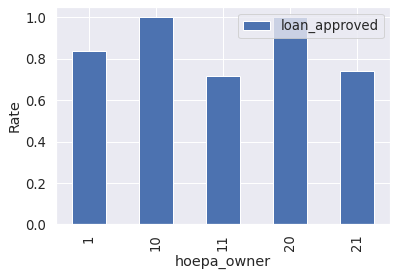

In [76]:
# df_selected.loc[:,'hoepa_owner'] = (df_selected['hoepa_status_name'].astype(str) + df_selected['owner_occupancy_name'].astype(str))

# get list of owner occupancy status name
owner_occup = df_selected['owner_occu_cat'].unique().tolist()

# get list of hoepa status name
hoepa  = df_selected['hoepa_status_cat'].unique().tolist()

# create feature initialize with `0`
df_selected.loc[:,'hoepa_owner'] = 0

for owner_st in owner_occup:
    for hoepa_st in hoepa:
#         get the index of the row in the two-feature combination
        indx = df_selected[(df_selected.loc[:,'owner_occu_cat'] == owner_st)\
        & (df_selected.loc[:,'hoepa_status_cat'] == hoepa_st)].index.tolist()
        
#         insert into a selected rows
        df_selected.loc[indx,'hoepa_owner'] = int(str(owner_st)+str(hoepa_st))
    
# plot
df_selected[['hoepa_owner','loan_approved']].groupby('hoepa_owner').mean().plot(kind='bar')
plt.ylabel('Rate');


### 2.0.4) NUMERICAL FEATURES

### Tract_to_msamd

`Tract_to_msamd` is the median family income for the tract compared to the median family income for the `MSA/MD`.
* The min,max and mean values of the `Tract_to_msamd` varies in the various counties.
* From the **boxplot**, counties also have various degree of outliers and they have minimal standard deviation.  
**Decision: We will fill in the null values in `Tract_to_msamd` with the mean value of each respective county  
<br>

* we will divide the `tract-to-income` feature into $20$ equal groups.
* It is observed from the **line plot** that, the higher the `tract-to-income` of the property location, the higher the chances of `loan approval`.

<br>  
* Lets then create a heatmap of `tract-to-income` and `type of property` and study its relationship aswell.
* The approval rate of all the `Property types` increases as the `tract-to-income` increase in exception of `Multi dwelling home` which is higher no matter the tract income. We will create new feature called `tract_to_prop` to hold the product of these two features.

  - At the far right side of the `barplot` you could see a smooth bar increasing towards the right-end. From the middle to the left-end has spike and bumps.

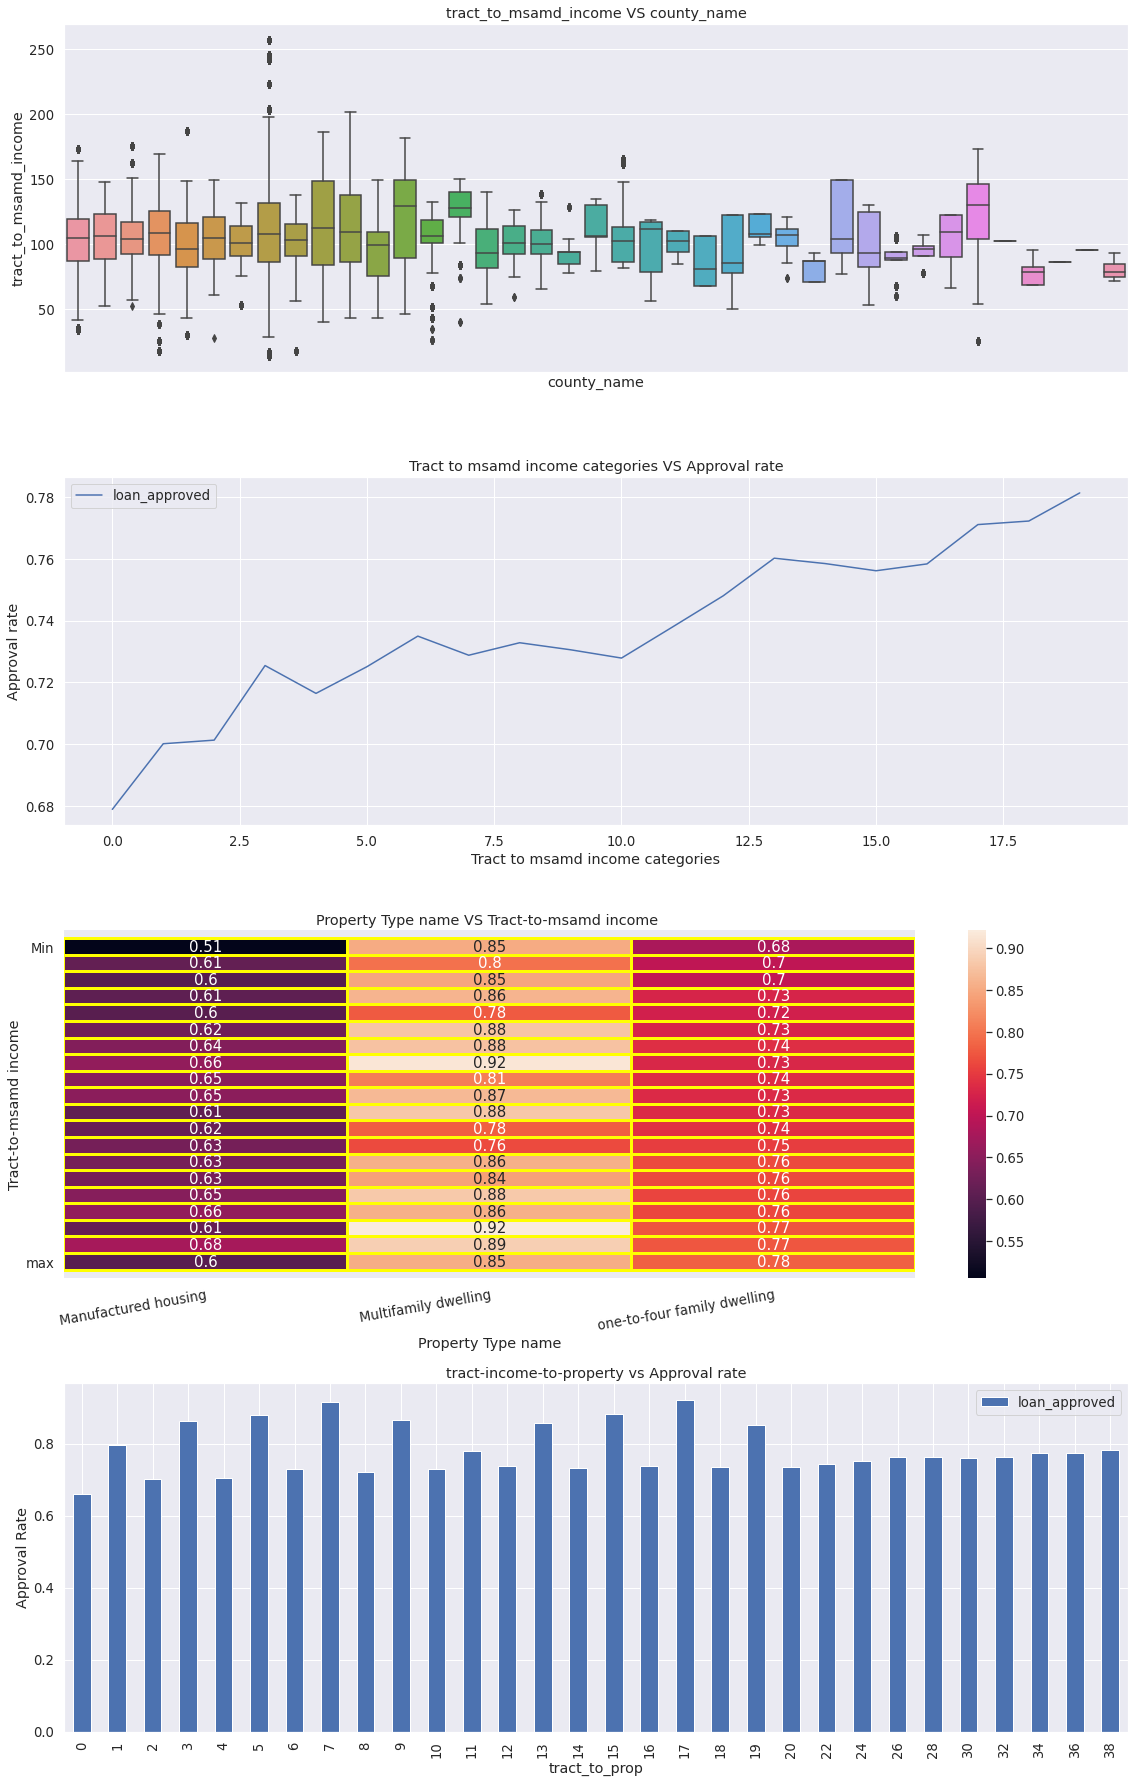

In [77]:
# create boxplot
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(16,25))
sns.boxplot(x='county_name',y='tract_to_msamd_income',data=df_selected,ax=ax[0])

# make the x_tick labels invisible
ax[0].set_title('tract_to_msamd_income VS county_name')
ax[0].axes.xaxis.set_ticks([]);

# fill tract_to_msamd_income with it average county tract_to_msamd_income value
df_selected['tract_to_msamd_income'] = df_selected[['county_name','tract_to_msamd_income']]\
                                       .groupby('county_name').transform(lambda x: x.fillna(x.mean()))


# group tract_to_msamd_income into 20 quantiles
df_selected.loc[:,'tract_to_msamd_cat'] = pd.qcut(df_selected['tract_to_msamd_income'],q=20,labels=np.arange(1,21,1))

# Finally let transform
df_selected.loc[:,'tract_to_msamd_cat'] = le.fit_transform(df_selected['tract_to_msamd_cat'])

df_selected[['tract_to_msamd_cat','loan_approved']].groupby('tract_to_msamd_cat').mean().plot(ax=ax[1])

ax[1].set_title('Tract to msamd income categories VS Approval rate')
ax[1].set_xlabel('Tract to msamd income categories')
ax[1].set_ylabel('Approval rate')




# make a pivot table with various features of the main dataframe.
df_pivot = pd.pivot_table(df_selected,values='loan_approved',
                                     index='tract_to_msamd_cat',columns='property_type_name')

# draw a heatmap
sns.heatmap(df_pivot,annot=True,annot_kws={"size": 15},linewidths=2, linecolor='yellow',ax=ax[2])

# get the bottom and top size of the map
bottom,top = ax[2].get_ylim()

# add 1/2 each to make the edge full
ax[2].set_ylim(bottom+0.5,top-0.5)

# providing x and y labels
ax[2].axes.xaxis.set_ticklabels(['Manufactured housing','Multifamily dwelling','one-to-four family dwelling'])
ax[2].axes.yaxis.set_ticklabels(['Min']+['']*18+['max'])

# rotate the xtick labels
plt.setp(ax[2].get_xticklabels(), rotation=10, ha="right",
         rotation_mode="anchor");

ax[2].set_title('Property Type name VS Tract-to-msamd income ')
ax[2].set_ylabel('Tract-to-msamd income')
ax[2].set_xlabel('Property Type name');



# create `tract_to_prop` from 'tract_to_msamd_cat' * 'prop_type_cat'
df_selected.loc[:,'tract_to_prop'] = df_selected[['tract_to_msamd_cat','prop_type_cat']].product(axis=1).astype(int)

# create a lineplot with tract_to_prop vs loan_approved
df_selected[['tract_to_prop','loan_approved']].groupby('tract_to_prop').mean().plot(kind='bar',ax=ax[3])

ax[3].set_title('tract-income-to-property vs Approval rate')
ax[3].set_ylabel('Approval Rate');

plt.tight_layout();


### Number of Owner Occupied Units
* This has $151$ missing values.
* `number_of_owner_occupied_units` correlates with the `tract_to_prop` as shown on the box plot.
* There is high standard deviation between the `Number of Owner Occupied Units`  in each respective county.
* we will then fill the missing values by the median values groupby the county.

              number_of_owner_occupied_units                                
                                         max         mean    min         std
tract_to_prop                                                               
28                                    2444.0  1607.373967  366.0  434.119445
6                                     2956.0  1140.546555  200.0  384.309681
10                                    2230.0  1294.648075  175.0  346.639708
36                                    2610.0  1637.463434  449.0  538.027918
38                                    2462.0  1525.191893  143.0  432.928107





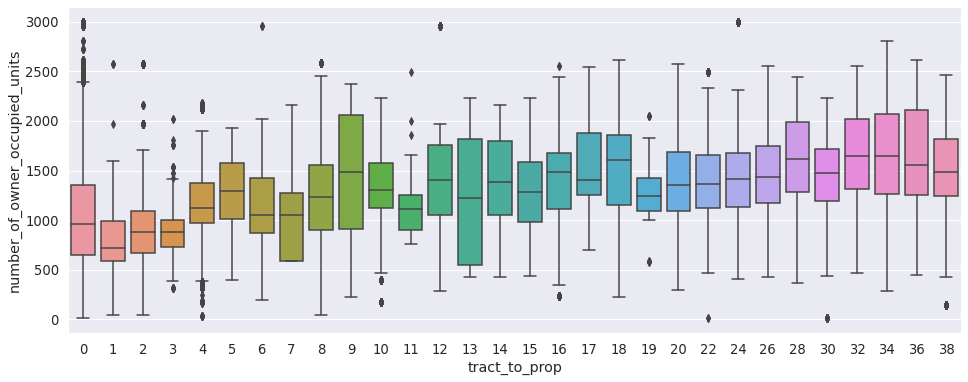

In [78]:
print(df_selected[['tract_to_prop','number_of_owner_occupied_units']]\
            .groupby('tract_to_prop',sort=False).agg(['max','mean','min','std']).head())

print('\n\n')

# create boxplot
fig,ax = plt.subplots(figsize=(16,6))
sns.boxplot(x='tract_to_prop',y='number_of_owner_occupied_units',data=df_selected);
plt.show()

# fill NaN values with the median value of each group

df_selected['number_of_owner_occupied_units'] = df_selected[['tract_to_prop','number_of_owner_occupied_units']]\
            .groupby('tract_to_prop').transform(lambda x:x.fillna(x.median()))

### 2.0.5) LETS PREPROCESS THE FOLLOWING CONTINOUS FEATURES TOGETHER

### `population`,`minority_population`,`number_of_1_to_4_family_units`
### `hud_median_family_income`,`census_tract_number`

* Lets fill the remaining missing values in the continuous variables with the median value grouped by the county_name.

* As we can see,the features have various degree of skewness. High skewed feature can lead to overweigth very high values in the model, even if it is scaled. We can apply two solutions here: either we use `log function` or group it into `bins`.  
* After the log transformation, it is crystal clear that the data is normalized and therefore the skewness too was reduced.


Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering.It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal

In [79]:
# list of continuous varible names
cont_vars = ['population','minority_population','number_of_1_to_4_family_units',
             'hud_median_family_income','census_tract_number']

# iterate over the list and fill in with the median value
for var in cont_vars:
    df_selected[var] = df_selected[['county_cat',var]].groupby('county_cat')\
                         .transform(lambda x: x.fillna(x.median()))

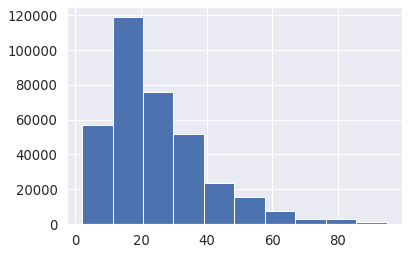

In [80]:
df_selected['minority_population'].hist()

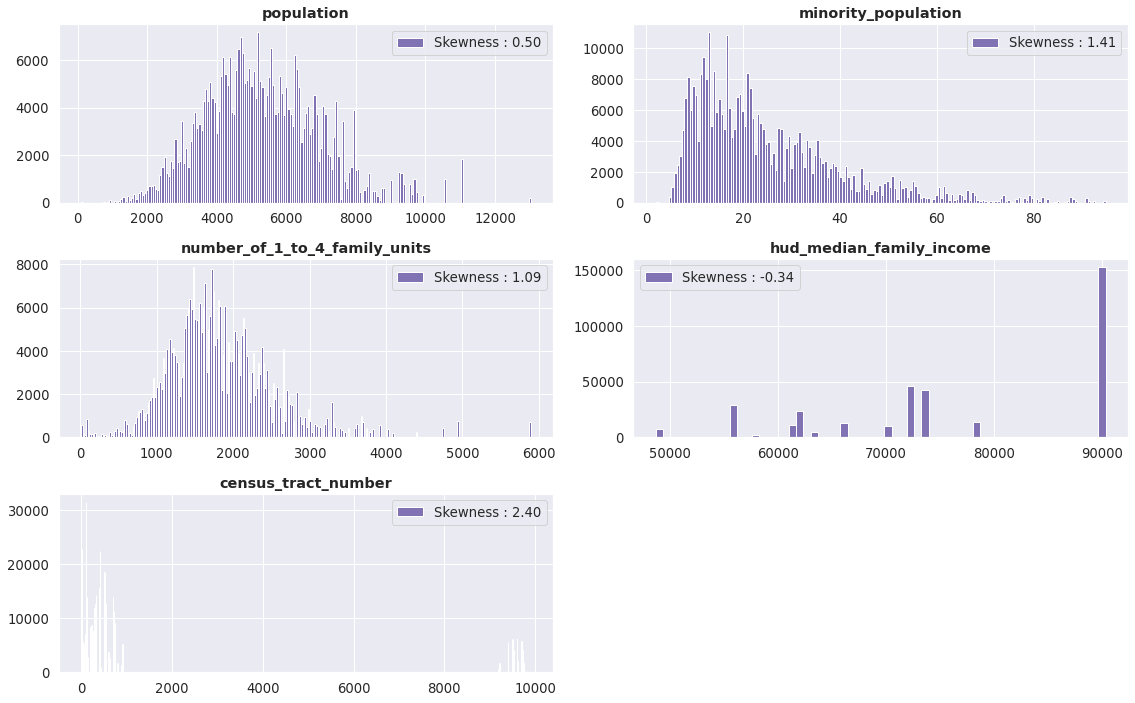

In [81]:
# create a figure with a width=16 and height=10
plt.figure(figsize=(16,10))

# assign axis to a variable
ax1,ax2,ax3,ax4,ax5 = plt.subplot(3,2,1),plt.subplot(3,2,2),plt.subplot(3,2,3),plt.subplot(3,2,4),plt.subplot(3,2,5)

for axes in enumerate((ax1,ax2,ax3,ax4,ax5)):
#   Iterate throught axis and do the plotting
    axes[1].hist(df_selected[cont_vars[axes[0]]],bins='auto',color="m", 
                 label="Skewness : %.2f"%(df_selected[cont_vars[axes[0]]].skew()))
    
    axes[1].legend(loc="best")
    axes[1].set_title(cont_vars[axes[0]],fontdict={'fontweight':'bold'})
plt.tight_layout();

In [82]:
# lets apply the `log` funtion to each feature
for cont in cont_vars:
    df_selected.loc[:,cont] = df_selected[cont].transform(np.log)

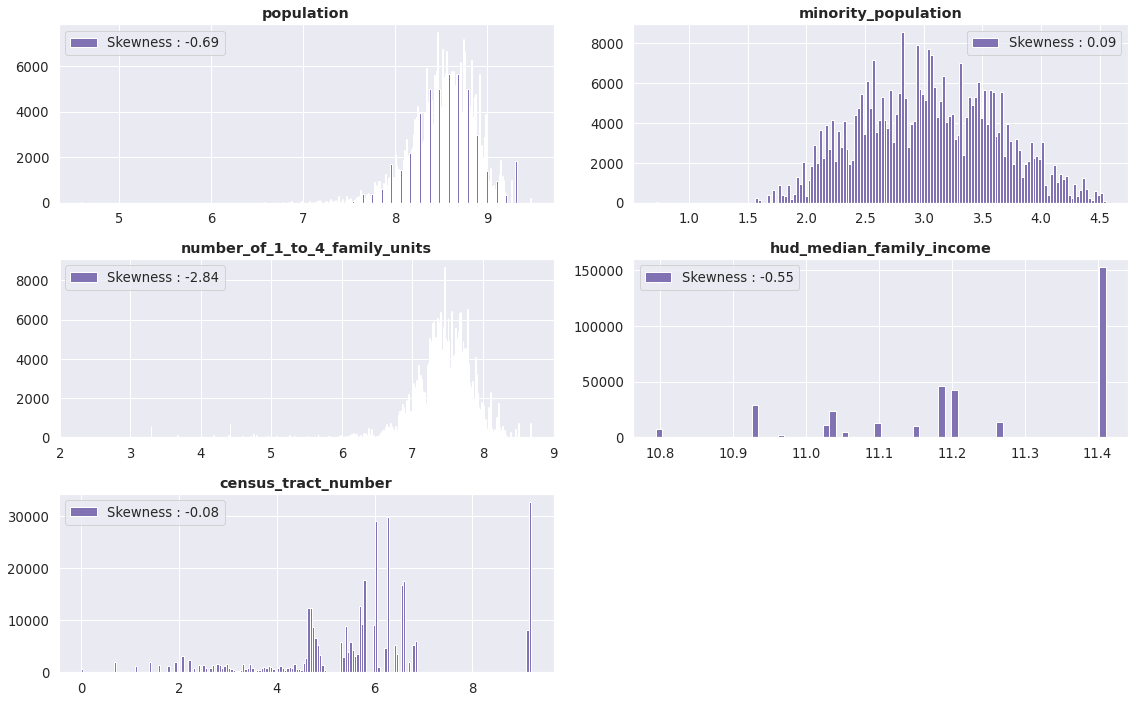

In [83]:
# AFTER LOG TRANSFORMATION
# create a figure with a width=16 and height=10
plt.figure(figsize=(16,10))

# assign axis to a variable
ax1,ax2,ax3,ax4,ax5 = plt.subplot(3,2,1),plt.subplot(3,2,2),plt.subplot(3,2,3),plt.subplot(3,2,4),plt.subplot(3,2,5)

for axes in enumerate((ax1,ax2,ax3,ax4,ax5)):
#   Iterate throught axis and do the plotting
    axes[1].hist(df_selected[cont_vars[axes[0]]],bins='auto',color="m", 
                 label="Skewness : %.2f"%(df_selected[cont_vars[axes[0]]].skew()))
    
    axes[1].legend(loc="best")
    axes[1].set_title(cont_vars[axes[0]],fontdict={'fontweight':'bold'})
plt.tight_layout();

In [84]:
# Now lets check some info about the data
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357643 entries, 0 to 466565
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           357643 non-null  float64
 1   population                      357643 non-null  float64
 2   minority_population             357643 non-null  float64
 3   number_of_owner_occupied_units  357643 non-null  float64
 4   number_of_1_to_4_family_units   357643 non-null  float64
 5   loan_amount_000s                357643 non-null  int64  
 6   hud_median_family_income        357643 non-null  float64
 7   property_type_name              357643 non-null  object 
 8   owner_occupancy_name            357643 non-null  object 
 9   loan_type_name                  357643 non-null  object 
 10  loan_purpose_name               357643 non-null  object 
 11  lien_status_name                357643 non-null  object 
 12  hoepa_status_nam

In [85]:
# we will drop all object type data column from the dataset
df_selected.drop(df_selected.select_dtypes('object').columns.tolist(),axis=1,inplace=True)

In [86]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357643 entries, 0 to 466565
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           357643 non-null  float64
 1   population                      357643 non-null  float64
 2   minority_population             357643 non-null  float64
 3   number_of_owner_occupied_units  357643 non-null  float64
 4   number_of_1_to_4_family_units   357643 non-null  float64
 5   loan_amount_000s                357643 non-null  int64  
 6   hud_median_family_income        357643 non-null  float64
 7   census_tract_number             357643 non-null  float64
 8   loan_approved                   357643 non-null  int64  
 9   co_appl_sex_vs_NA_cat           357643 non-null  int64  
 10  appl_gender_vs_NA               357643 non-null  int64  
 11  is_majority                     357643 non-null  int64  
 12  is_black        

* The following categorical features and converted to one-hot-encoded features using the `OneHotEncoder()`   
(`prop_type_ca`',`owner_occu_ca`',`loan_type_cat`,`loan_purp_cat`,`lien_status_cat`,`hoepa_status_cat`,    `appl_ethnicity_cat`,`agency_cat`,`county_cat`,`tract_to_prop`,`co_appl_sex_vs_NA_cat`,  
`appl_gender_vs_NA`,`is_majority`,`is_black`,`hoepa_owner`) the rest of the features are not converted because they are ordinal unlike the previous ones.

* All the unwanted features are dropped afterwards

In [87]:
# Get all the column names with `int32` and `int64` datatype
to_hot_encode = df_selected.select_dtypes('int32').columns.tolist() + df_selected.select_dtypes('int64')\
                           .drop(['loan_amount_000s','loan_approved','tract_to_msamd_cat'],axis=1).columns.tolist() 

In [88]:
encoded_features = []
for feature in to_hot_encode:
    encoded_feat = OneHotEncoder(categories='auto').fit_transform(df_selected[feature].values.reshape(-1, 1)).toarray()
    n = df_selected[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = df_selected.index
    encoded_features.append(encoded_df)

# concatenate the encoded features to the dataframe and drop the previous features
df_X_y_train_test = pd.concat([df_selected, *encoded_features], axis=1).drop(to_hot_encode,axis=1)

<br>
<h1'style=text-align:center';>3.0.0) PREDICTION SECTION<h1>
<br>

In [89]:
df_X_y_train_test.head()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,census_tract_number,loan_approved,tract_to_msamd_cat,...,tract_to_prop_21,tract_to_prop_22,tract_to_prop_23,tract_to_prop_24,tract_to_prop_25,tract_to_prop_26,tract_to_prop_27,tract_to_prop_28,tract_to_prop_29,tract_to_prop_30
0,121.690002,9.033723,3.169265,2175.0,7.886081,227,11.202316,6.024101,1,14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,83.370003,8.500047,3.177637,1268.0,7.482682,240,10.966473,9.127829,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,91.129997,8.532082,2.469793,1136.0,7.516433,241,11.202316,6.025866,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,146.169998,8.523573,2.150599,1525.0,7.506592,351,11.202316,6.004134,1,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,162.470001,8.553139,2.351375,1705.0,7.651596,417,11.265745,6.810142,1,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### The entire dataset is being divided into train and test set and normalized

In [90]:
# Split the dataset into train and test with 75% and 25% respectively
X_train, X_test, y_train, y_test = train_test_split(df_X_y_train_test.drop('loan_approved',axis=1),
                                                    df_X_y_train_test['loan_approved'], test_size=0.25, random_state=42)

# reset the indices
for data in [X_train, X_test, y_train, y_test]:
    data.reset_index(drop=True,inplace=True)

In [91]:
# Normalization
scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)

X_test_norm = scaler.transform(X_test)

# print current shapes
print('X_train shape = {} \n y_train shape = {}\n'.format(X_train_norm.shape,y_train.shape))
print('X_test shape = {} \n y_test shape = {}'.format(X_test_norm.shape,y_test.shape))

X_train shape = (268232, 120) 
 y_train shape = (268232,)

X_test shape = (89411, 120) 
 y_test shape = (89411,)


In [92]:
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)


In [93]:

leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1) 

In [94]:
# Lets Intantiate our classifier
rc = RandomForestClassifier(oob_score=True)
# We can get the defaults parameters with this function
rc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

n_estimators = number of trees in the foreset   
max_features = max number of features considered for splitting a node  
max_depth = max number of levels in each decision tree  
min_samples_split = min number of data points placed in a node before the node is split  
min_samples_leaf = min number of data points allowed in a leaf node  
bootstrap = method for sampling data points (with or without replacement)  

In [95]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test_norm), N * 2)), 
                     columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])

importances = pd.DataFrame(np.zeros((X_train_norm.shape[1], N)),
    columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=df_X_y_train_test.drop('loan_approved',axis=1).columns)
importances

fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)
y_train = y_train.reset_index(drop=True)
for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train_norm, y_train), 1):
    print('Fold {}\n'.format(fold))
    # Fitting the model
    leaderboard_model.fit(X_train_norm[trn_idx], y_train[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train[trn_idx], leaderboard_model.predict_proba(X_train_norm[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
#     Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train[val_idx], leaderboard_model.predict_proba(X_train_norm[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test_norm probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = leaderboard_model.predict_proba(X_test_norm)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = leaderboard_model.predict_proba(X_test_norm)[:, 1]
    importances.iloc[:, fold - 1] = leaderboard_model.feature_importances_
        
    oob += leaderboard_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, leaderboard_model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  3.4min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:   13.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 1 OOB Score: 0.7384160123028171

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  3.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:   14.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 2 OOB Score: 0.7383973716708997

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  3.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:   14.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 3 OOB Score: 0.7384731529549924

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  3.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:   14.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 4 OOB Score: 0.7384824732275171

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:  3.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:   13.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

Fold 5 OOB Score: 0.7384778130912548

Average OOB Score: 0.7384493646494963
